# Projeto Sementes

## Contextualização

A cultura da soja (Glycine Max), durante todo o seu ciclo, está sujeita ao ataque de diferentes insetos-praga. A ação destes insetos-praga de solo pode causar falhas na lavoura na implantação da cultura, devido a eles se alimentarem: das sementes após a semeadura, de raízes após a germinação e da parte aérea das plântulas após a emergência, isso, na fase em que a planta em formação está mais suscetível a danos e morte.

O tratamento das sementes é considerado o método mais eficiente no controle de pragas incidentes, durante o desenvolvimento inicial das culturas agrícolas. Além disso, resultados de pesquisas têm evidenciado que alguns produtos, quando aplicados sozinhos e/ou em combinação com outros, podem, em determinadas situações, ocasionar redução na germinação das sementes, e também, na sobrevivência das plântulas, devido ao efeito de fitotoxicidade.

O uso preventivo de agroquímicos no tratamento de sementes é uma alternativa para evitar possíveis perdas decorrentes das ações de pragas de solo e da parte aérea. Essa prática vem sendo amplamente utilizada, pois confere à planta condições de defesa, possibilitando maior potencial para o desenvolvimento inicial da cultura e contribui para a obtenção do estande inicial almejado.

## Organização do Grupo

*   *Gerente do Projeto*: Lucas
*   *Documentação e Relatórios*: Lucas, Paloma e Vitor
*   *Desenvolvimento e Análises*: Alexsander, Arthur e Lucas

### Organização do Desenvolvimento:

*   Tratamento dos Dados: Lucas
*   Medidas Descritivas: Alexsander
*   Gráficos Gerais: Alexsander
*   Incertezas e Comparações Estatísticas: Artur
*   Análise Bivariada: Alexsander e Lucas
*   Revisão e Estruturação do código: Lucas




### Organização dos Relatório:

* Introdução e Metodologia: Paloma
* Resultados Medidas Descritivas + Gráficos Gerais: Vitor
* Resultados Incertezas e Comparações Estatísticas: Artur
* Resultados Análise Bivariada: Lucas
* Conclusão: Vitor



## Desenvolvimento

In [1]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

### Tratamento dos Dados

In [2]:
# Coletando dados do Excel "DadosGeminacao"
dados_germinacao = pd.read_csv("https://raw.githubusercontent.com/Cizika/Projeto-Sementes/master/Dados/DadosGerminacao.csv", index_col=0, delimiter= ";")

In [3]:
# Renomeando a chave do indíce e das colunas
dados_germinacao.index.names = ['Tipo de Tratamento']
dados_germinacao.columns.names = ['Dias de Armazenamento']

In [4]:
# Visualização do DataFrame principal
dados_germinacao

Dias de Armazenamento,0,5,10,15
Tipo de Tratamento,,,,
Controle,3,3,3,3
A,2,2,2,2
B,3,3,4,4
C,3,2,3,3


In [5]:
# Gerando Tabela transposta
dados_germinacao_T = dados_germinacao.T
dados_germinacao_T

Tipo de Tratamento,Controle,A,B,C
Dias de Armazenamento,,,,
0,3,2,3,3
5,3,2,3,2
10,3,2,4,3
15,3,2,4,3


In [6]:
# Total de sementes germinadas por dia
total_dias = dados_germinacao.sum()
total_dias

Dias de Armazenamento
0     11
5     10
10    12
15    12
dtype: int64

In [7]:
# Total de sementes germinadas por tipo de tratamento
total_tratamentos = dados_germinacao_T.sum()
total_tratamentos

Tipo de Tratamento
Controle    12
A            8
B           14
C           11
dtype: int64

In [8]:
# Total de Sementes germinadas no experimento
total_germinadas = total_tratamentos.sum()
total_germinadas

45

#### Relativizando os dados (Frequência Relativa)
Criando DataFrames em proporção/porcentagem a partir dos dados de germinação, do total de sementes germinadas por dia, do total de sementes germinadas por tipo de tratamento e do total de sementes germinadas no experimentos.

In [9]:
dados_proporcao = dados_germinacao.apply(lambda x: 100 * x/dados_germinacao.shape[0])
dados_proporcao

Dias de Armazenamento,0,5,10,15
Tipo de Tratamento,,,,
Controle,75.0,75.0,75.0,75.0
A,50.0,50.0,50.0,50.0
B,75.0,75.0,100.0,100.0
C,75.0,50.0,75.0,75.0


In [10]:
dados_proporcao_T = dados_proporcao.T
dados_proporcao_T

Tipo de Tratamento,Controle,A,B,C
Dias de Armazenamento,,,,
0,75.0,50.0,75.0,75.0
5,75.0,50.0,75.0,50.0
10,75.0,50.0,100.0,75.0
15,75.0,50.0,100.0,75.0


In [11]:
total_dias_prop = total_dias.apply(lambda x: 100 * x/16)
total_dias_prop

Dias de Armazenamento
0     68.75
5     62.50
10    75.00
15    75.00
dtype: float64

In [12]:
total_tratamentos_prop = total_tratamentos.apply(lambda x: 100 * x/16)
total_tratamentos_prop

Tipo de Tratamento
Controle    75.00
A           50.00
B           87.50
C           68.75
dtype: float64

In [13]:
total_germinadas_prop = 100 * total_germinadas/64
total_germinadas_prop

70.3125

### Medidas Descritivas

In [14]:
# Função para calcular o coeficiente de variância (CV)
def coeficiente_variancia(table):
    return 100 * table.std() / table.mean()
# Função para calcular a amplitude
def amplitude(table):
    return table.max() - table.min()

# Utilizando método aggregate do Pandas para aplicar medidas de posição e dispersão ao DataFrame
medidas_descritivas = dados_proporcao.agg(["min","max","mean","median","var","std",coeficiente_variancia,amplitude])
medidas_T_descritivas = dados_proporcao_T.agg(["min","max","mean","median","var","std",coeficiente_variancia,amplitude])
medidas_descritivas_dias = total_dias_prop.agg(["min","max","mean","median","var","std",coeficiente_variancia,amplitude])
medidas_descritivas_tratamentos = total_tratamentos_prop.agg(["min","max","mean","median","var","std",coeficiente_variancia,amplitude])

In [15]:
# Renomeando index do DataFrame de medidas descritivas
novos_nomes = {
    "min":"Minimo",
    "max": "Maximo",
    "mean":"Media",
    "median": "Mediana",
    "var": "Variancia",
    "std": "Desvio-padrao",
    "coeficiente_variancia":"Coeficiente de Variancia",
    "amplitude": "Amplitude"
}
medidas_descritivas = medidas_descritivas.rename(novos_nomes)
medidas_T_descritivas = medidas_T_descritivas.rename(novos_nomes)

medidas_descritivas_dias = medidas_descritivas_dias.rename(novos_nomes)
medidas_descritivas_tratamentos = medidas_descritivas_tratamentos.rename(novos_nomes)

In [16]:
# Arredondando casas decimais das medidas descritivas e de dispersão
medidas_descritivas = medidas_descritivas.round(3)
medidas_T_descritivas = medidas_T_descritivas.round(3)
medidas_descritivas_dias = medidas_descritivas_dias.round(3)
medidas_descritivas_tratamentos = medidas_descritivas_tratamentos.round(3)

In [17]:
medidas_descritivas

,0,5,10,15
Minimo,50.000,50.000,50.000,50.000
Maximo,75.000,75.000,100.000,100.000
Media,68.750,62.500,75.000,75.000
Mediana,75.000,62.500,75.000,75.000
Variancia,156.250,208.333,416.667,416.667
Desvio-padrao,12.500,14.434,20.412,20.412
Coeficiente de Variancia,18.182,23.094,27.217,27.217
Amplitude,25.000,25.000,50.000,50.000


In [18]:
medidas_T_descritivas

,Controle,A,B,C
Minimo,75.0,50.0,75.000,50.000
Maximo,75.0,50.0,100.000,75.000
Media,75.0,50.0,87.500,68.750
Mediana,75.0,50.0,87.500,75.000
Variancia,0.0,0.0,208.333,156.250
Desvio-padrao,0.0,0.0,14.434,12.500
Coeficiente de Variancia,0.0,0.0,16.496,18.182
Amplitude,0.0,0.0,25.000,25.000


In [19]:
medidas_descritivas_dias

Minimo                      62.500
Maximo                      75.000
Media                       70.312
Mediana                     71.875
Variancia                   35.807
Desvio-padrao                5.984
Coeficiente de Variancia     8.510
Amplitude                   12.500
dtype: float64

In [20]:
medidas_descritivas_tratamentos

Minimo                       50.000
Maximo                       87.500
Media                        70.312
Mediana                      71.875
Variancia                   244.141
Desvio-padrao                15.625
Coeficiente de Variancia     22.222
Amplitude                    37.500
dtype: float64

### Gráficos Gerais

#### Boxplots

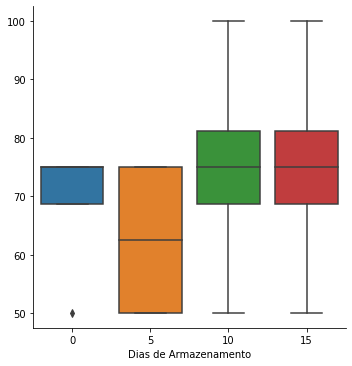

In [21]:
# Utilizando Seaborn para plotar boxplots
sns.catplot(kind="box", data=dados_proporcao)

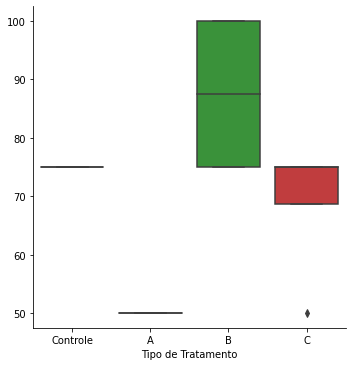

In [22]:
sns.catplot(kind="box", data=dados_proporcao_T)

#### Gráficos de Barra

In [23]:
# Criando dataframe com os dados empilhados e índices como coluna
dados_desempilhados_porcentagem = pd.DataFrame(dados_proporcao.stack(), columns = ["Porcentagem Germinada"]).reset_index()
dados_desempilhados_porcentagem.head()

,Tipo de Tratamento,Dias de Armazenamento,Porcentagem Germinada
0,Controle,0,75.0
1,Controle,5,75.0
2,Controle,10,75.0
3,Controle,15,75.0
4,A,0,50.0


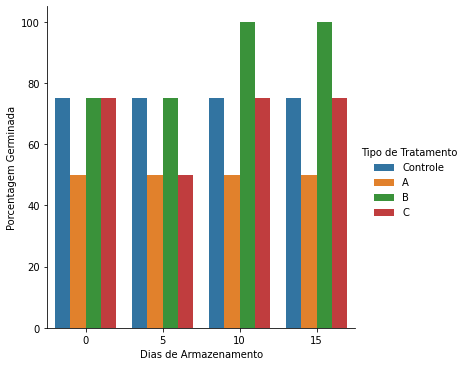

In [24]:
# Utilizando biblioteca Seaborn para plotar um gráfico de PORCENTAGEM DE GERMINADAS por DIAS ARMAZENADOS
sns.catplot(kind="bar",x='Dias de Armazenamento', y='Porcentagem Germinada', hue='Tipo de Tratamento', data=dados_desempilhados_porcentagem)

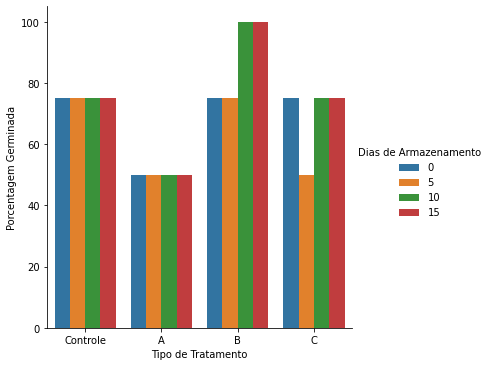

In [25]:
# Utilizando biblioteca Seaborn para plotar um gráfico de PORCENTAGEM DE GERMINADAS por TIPO DE TRATAMENTO
sns.catplot(kind="bar",x='Tipo de Tratamento', y='Porcentagem Germinada', hue='Dias de Armazenamento', data=dados_desempilhados_porcentagem)

### Incertezas e Comparações Estatísticas

#### Calculando a estimativa intervalar para determinada semente em determinado dia

In [26]:
# Utilizando dados de proporção decimais para o cálculo da margem de erro
margem_erro = dados_proporcao/100

# Calculando a variância de cada amostra de determinado dia e tipo de tratamento
for dia, tipos in margem_erro.iteritems():
  for tratamento, valor in tipos.iteritems():
    margem_erro[dia][tratamento] = 100 * valor * (1 - valor)

In [27]:
# Mostrando as variâncias de cada tratamento para cada dia
print(tabulate(margem_erro, headers='keys', tablefmt='fancy_grid', numalign="center"))

╒══════════════════════╤═══════╤═══════╤═══════╤═══════╕
│ Tipo de Tratamento   │   0   │   5   │  10   │  15   │
╞══════════════════════╪═══════╪═══════╪═══════╪═══════╡
│ Controle             │ 18.75 │ 18.75 │ 18.75 │ 18.75 │
├──────────────────────┼───────┼───────┼───────┼───────┤
│ A                    │  25   │  25   │  25   │  25   │
├──────────────────────┼───────┼───────┼───────┼───────┤
│ B                    │ 18.75 │ 18.75 │   0   │   0   │
├──────────────────────┼───────┼───────┼───────┼───────┤
│ C                    │ 18.75 │  25   │ 18.75 │ 18.75 │
╘══════════════════════╧═══════╧═══════╧═══════╧═══════╛


##### Sementes sem tratamento (Controle)

In [28]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes Controle armazenadas por ZERO dias
intervalo_zero_dias = 2 * np.sqrt(margem_erro["0"]["Controle"]/4)

# Calculando Limite inferior para sementes Controle em 0 dias
lim_inf_0_contr = dados_proporcao["0"]["Controle"] - intervalo_zero_dias
lim_inf_0_contr = lim_inf_0_contr.round(2)

# Calculando Limite superior para sementes Controle em 0 dias
lim_sup_0_contr = dados_proporcao["0"]["Controle"] + intervalo_zero_dias
lim_sup_0_contr = lim_sup_0_contr.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo Controle armazenadas por 0 dias é de (" + str(lim_inf_0_contr) + ", " + str(lim_sup_0_contr) + ").")

O Intervalo de confiança de 95% para as sementes do tipo Controle armazenadas por 0 dias é de (70.67, 79.33).


In [29]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes Controle armazenadas por CINCO dias
intervalo_cinco_dias = 2 * np.sqrt(margem_erro["5"]["Controle"]/4)

# Calculando Limite inferior para sementes Controle em 5 dias
lim_inf_5_contr = dados_proporcao["5"]["Controle"] - intervalo_cinco_dias
lim_inf_5_contr = lim_inf_5_contr.round(2)

# Calculando Limite superior para sementes Controle em 5 dias
lim_sup_5_contr = dados_proporcao["5"]["Controle"] + intervalo_cinco_dias
lim_sup_5_contr = lim_sup_5_contr.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo Controle armazenadas por 5 dias é de (" + str(lim_inf_5_contr) + ", " + str(lim_sup_5_contr) + ").")

O Intervalo de confiança de 95% para as sementes do tipo Controle armazenadas por 5 dias é de (70.67, 79.33).


In [30]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes Controle armazenadas por DEZ dias
intervalo_dez_dias = 2 * np.sqrt(margem_erro["10"]["Controle"]/4)

# Calculando Limite inferior para sementes Controle em 10 dias
lim_inf_10_contr = dados_proporcao["10"]["Controle"] - intervalo_dez_dias
lim_inf_10_contr = lim_inf_10_contr.round(2)

# Calculando Limite superior para sementes Controle em 10 dias
lim_sup_10_contr = dados_proporcao["10"]["Controle"] + intervalo_dez_dias
lim_sup_10_contr = lim_sup_10_contr.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo Controle armazenadas por 10 dias é de (" + str(lim_inf_10_contr) + ", " + str(lim_sup_10_contr) + ").")

O Intervalo de confiança de 95% para as sementes do tipo Controle armazenadas por 10 dias é de (70.67, 79.33).


In [31]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes Controle armazenadas por QUINZE dias
intervalo_quinze_dias = 2 * np.sqrt(margem_erro["15"]["Controle"]/4)

# Calculando Limite inferior para sementes Controle em 15 dias
lim_inf_15_contr = dados_proporcao["15"]["Controle"] - intervalo_quinze_dias
lim_inf_15_contr = lim_inf_15_contr.round(2)

# Calculando Limite superior para sementes Controle em 15 dias
lim_sup_15_contr = dados_proporcao["15"]["Controle"] + intervalo_quinze_dias
lim_sup_15_contr = lim_sup_15_contr.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo Controle armazenadas por 15 dias é de (" + str(lim_inf_15_contr) + ", " + str(lim_sup_15_contr) + ").")

O Intervalo de confiança de 95% para as sementes do tipo Controle armazenadas por 15 dias é de (70.67, 79.33).


##### Sementes tratadas com o Agroquímico do Tipo A

In [32]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes A armazenadas por ZERO dias
intervalo_zero_dias = 2 * np.sqrt(margem_erro["0"]["A"]/4)

# Calculando Limite inferior para sementes A em 0 dias
lim_inf_A0 = dados_proporcao["0"]["A"] - intervalo_zero_dias

# Calculando Limite superior para sementes A em 0 dias
lim_sup_A0 = dados_proporcao["0"]["A"] + intervalo_zero_dias

print("O Intervalo de confiança de 95% para as sementes do tipo A armazenadas por 0 dias é de (" + str(lim_inf_A0) + ", " + str(lim_sup_A0) + ").")

O Intervalo de confiança de 95% para as sementes do tipo A armazenadas por 0 dias é de (45.0, 55.0).


In [33]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes A armazenadas por CINCO dias
intervalo_cinco_dias = 2 * np.sqrt(margem_erro["5"]["A"]/4)

# Calculando Limite inferior para sementes A em 5 dias
lim_inf_A5 = dados_proporcao["5"]["A"] - intervalo_cinco_dias
lim_inf_A5 = lim_inf_A5.round(2)

# Calculando Limite superior para sementes A em 5 dias
lim_sup_A5 = dados_proporcao["5"]["A"] + intervalo_cinco_dias
lim_sup_A5 = lim_sup_A5.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo A armazenadas por 5 dias é de (" + str(lim_inf_A5) + ", " + str(lim_sup_A5) + ").")

O Intervalo de confiança de 95% para as sementes do tipo A armazenadas por 5 dias é de (45.0, 55.0).


In [34]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes A armazenadas por DEZ dias
intervalo_dez_dias = 2 * np.sqrt(margem_erro["10"]["A"]/4)

# Calculando Limite inferior para sementes A em 10 dias
lim_inf_A10 = dados_proporcao["10"]["A"] - intervalo_dez_dias
lim_inf_A10 = lim_inf_A10.round(2)

# Calculando Limite superior para sementes A em 10 dias
lim_sup_A10 = dados_proporcao["10"]["A"] + intervalo_dez_dias
lim_sup_A10 = lim_sup_A10.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo A armazenadas por 10 dias é de (" + str(lim_inf_A10) + ", " + str(lim_sup_A10) + ").")

O Intervalo de confiança de 95% para as sementes do tipo A armazenadas por 10 dias é de (45.0, 55.0).


In [35]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes A armazenadas por QUINZE dias
intervalo_quinze_dias = 2 * np.sqrt(margem_erro["15"]["A"]/4)

# Calculando Limite inferior para sementes A em 15 dias
lim_inf_A15 = dados_proporcao["15"]["A"] - intervalo_quinze_dias
lim_inf_A15 = lim_inf_A15.round(2)

# Calculando Limite superior para sementes A em 15 dias
lim_sup_A15 = dados_proporcao["15"]["A"] + intervalo_quinze_dias
lim_sup_A15 = lim_sup_A15.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo A armazenadas por 15 dias é de (" + str(lim_inf_A15) + ", " + str(lim_sup_A15) + ").")

O Intervalo de confiança de 95% para as sementes do tipo A armazenadas por 15 dias é de (45.0, 55.0).


##### Sementes tratadas com o Agroquímico do Tipo B

In [36]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes B armazenadas por ZERO dias
intervalo_zero_dias = 2 * np.sqrt(margem_erro["0"]["B"]/4)

# Calculando Limite inferior para sementes B em 0 dias
lim_inf_B0 = dados_proporcao["0"]["B"] - intervalo_zero_dias
lim_inf_B0 = lim_inf_B0.round(2)

# Calculando Limite superior para sementes B em 0 dias
lim_sup_B0 = dados_proporcao["0"]["B"] + intervalo_zero_dias
lim_sup_B0 = lim_sup_B0.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo B armazenadas por 0 dias é de (" + str(lim_inf_B0) + ", " + str(lim_sup_B0) + ").")

O Intervalo de confiança de 95% para as sementes do tipo B armazenadas por 0 dias é de (70.67, 79.33).


In [37]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes B armazenadas por CINCO dias
intervalo_cinco_dias = 2 * np.sqrt(margem_erro["5"]["B"]/4)

# Calculando Limite inferior para sementes B em 5 dias
lim_inf_B5 = dados_proporcao["5"]["B"] - intervalo_cinco_dias
lim_inf_B5 = lim_inf_B5.round(2)

# Calculando Limite superior para sementes B em 5 dias
lim_sup_B5 = dados_proporcao["5"]["B"] + intervalo_cinco_dias
lim_sup_B5 = lim_sup_B5.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo B armazenadas por 5 dias é de (" + str(lim_inf_B5) + ", " + str(lim_sup_B5) + ").")

O Intervalo de confiança de 95% para as sementes do tipo B armazenadas por 5 dias é de (70.67, 79.33).


In [38]:
## VARIÂNCIA ZERO para 10 e 15 dias

Não faz sentido calcular intervalo de confiança para as sementes do Tipo B armazenadas por 10 e 15 dias uma vez que a variância é zero.

##### Sementes tratadas com o Agroquímico do Tipo C

In [39]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes C armazenadas por ZERO dias
intervalo_zero_dias = 2 * np.sqrt(margem_erro["0"]["C"]/4)

# Calculando Limite inferior para sementes C em 0 dias
lim_inf_C0 = dados_proporcao["0"]["C"] - intervalo_zero_dias
lim_inf_C0 = lim_inf_C0.round(2)

# Calculando Limite superior para sementes C em 0 dias
lim_sup_C0 = dados_proporcao["0"]["C"] + intervalo_zero_dias
lim_sup_C0 = lim_sup_C0.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo C armazenadas por 0 dias é de (" + str(lim_inf_C0) + ", " + str(lim_sup_C0) + ").")

O Intervalo de confiança de 95% para as sementes do tipo C armazenadas por 0 dias é de (70.67, 79.33).


In [40]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes C armazenadas por CINCO dias
intervalo_cinco_dias = 2 * np.sqrt(margem_erro["5"]["C"]/4)

# Calculando Limite inferior para sementes C em 5 dias
lim_inf_C5 = dados_proporcao["5"]["C"] - intervalo_cinco_dias
lim_inf_C5 = lim_inf_C5.round(2)

# Calculando Limite superior para sementes C em 5 dias
lim_sup_C5 = dados_proporcao["5"]["C"] + intervalo_cinco_dias
lim_sup_C5 = lim_sup_C5.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo C armazenadas por 5 dias é de (" + str(lim_inf_C5) + ", " + str(lim_sup_C5) + ").")

O Intervalo de confiança de 95% para as sementes do tipo C armazenadas por 5 dias é de (45.0, 55.0).


In [41]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes C armazenadas por DEZ dias
intervalo_dez_dias = 2 * np.sqrt(margem_erro["10"]["C"]/4)

# Calculando Limite inferior para sementes C em 10 dias
lim_inf_C10 = dados_proporcao["10"]["C"] - intervalo_dez_dias
lim_inf_C10 = lim_inf_C10.round(2)

# Calculando Limite superior para sementes C em 10 dias
lim_sup_C10 = dados_proporcao["10"]["C"] + intervalo_dez_dias
lim_sup_C10 = lim_sup_C10.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo C armazenadas por 10 dias é de (" + str(lim_inf_C10) + ", " + str(lim_sup_C10) + ").")

O Intervalo de confiança de 95% para as sementes do tipo C armazenadas por 10 dias é de (70.67, 79.33).


In [42]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes C armazenadas por QUINZE dias
intervalo_quinze_dias = 2 * np.sqrt(margem_erro["15"]["C"]/4)

# Calculando Limite inferior para sementes C em 15 dias
lim_inf_C15 = dados_proporcao["15"]["C"] - intervalo_quinze_dias
lim_inf_C15 = lim_inf_C15.round(2)

# Calculando Limite superior para sementes C em 15 dias
lim_sup_C15 = dados_proporcao["15"]["C"] + intervalo_quinze_dias
lim_sup_C15 = lim_sup_C15.round(2)

print("O Intervalo de confiança de 95% para as sementes do tipo C armazenadas por 15 dias é de (" + str(lim_inf_C15) + ", " + str(lim_sup_C15) + ").")

O Intervalo de confiança de 95% para as sementes do tipo C armazenadas por 15 dias é de (70.67, 79.33).


#### Calculando a estimativa intervalar para todos os dias

In [43]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para sementes armazenadas por ZERO dias
intervalo_zero_dias = 2 * np.sqrt(medidas_descritivas["0"]["Variancia"]/16)

# Calculando Limite inferior para sementes 0 dias
lim_inf_0 = medidas_descritivas["0"]["Media"] - intervalo_zero_dias

# Calculando Limite superior para sementes 0 dias
lim_sup_0 = medidas_descritivas["0"]["Media"] + intervalo_zero_dias

In [44]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para sementes armazenadas por CINCO dias
intervalo_cinco_dias = 2 * np.sqrt(medidas_descritivas["5"]["Variancia"]/16)

# Calculando Limite inferior para sementes 5 dias
lim_inf_5 = medidas_descritivas["5"]["Media"] - intervalo_cinco_dias
lim_inf_5 = lim_inf_5.round(2)

# Calculando Limite superior para sementes 5 dias
lim_sup_5 = medidas_descritivas["5"]["Media"] + intervalo_cinco_dias
lim_sup_5 = lim_sup_5.round(2)

In [45]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para sementes armazenadas por DEZ dias
intervalo_dez_dias = 2 * np.sqrt(medidas_descritivas["10"]["Variancia"]/16)

# Calculando Limite inferior para sementes 10 dias
lim_inf_10 = medidas_descritivas["10"]["Media"] - intervalo_dez_dias
lim_inf_10 = lim_inf_10.round(2)

# Calculando Limite superior para sementes 10 dias
lim_sup_10 = medidas_descritivas["10"]["Media"] + intervalo_dez_dias
lim_sup_10 = lim_sup_10.round(2)

In [46]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para sementes armazenadas por QUINZE dias
intervalo_quinze_dias = 2 * np.sqrt(medidas_descritivas["15"]["Variancia"]/16)

# Calculando Limite inferior para sementes 5 dias
lim_inf_15 = medidas_descritivas["15"]["Media"] - intervalo_quinze_dias
lim_inf_15 = lim_inf_15.round(2)

# Calculando Limite superior para sementes 5 dias
lim_sup_15 = medidas_descritivas["15"]["Media"] + intervalo_quinze_dias
lim_sup_15 = lim_sup_15.round(2)

In [47]:
print("O Intervalo de confiança de 95% para as sementes armazenadas por 0 dias é de (" + str(lim_inf_0) + ", " + str(lim_sup_0) + ").")
print("O Intervalo de confiança de 95% para as sementes armazenadas por 5 dias é de (" + str(lim_inf_5) + ", " + str(lim_sup_5) + ").")
print("O Intervalo de confiança de 95% para as sementes armazenadas por 10 dias é de (" + str(lim_inf_10) + ", " + str(lim_sup_10) + ").")
print("O Intervalo de confiança de 95% para as sementes armazenadas por 15 dias é de (" + str(lim_inf_15) + ", " + str(lim_sup_15) + ").")

O Intervalo de confiança de 95% para as sementes armazenadas por 0 dias é de (62.5, 75.0).
O Intervalo de confiança de 95% para as sementes armazenadas por 5 dias é de (55.28, 69.72).
O Intervalo de confiança de 95% para as sementes armazenadas por 10 dias é de (64.79, 85.21).
O Intervalo de confiança de 95% para as sementes armazenadas por 15 dias é de (64.79, 85.21).


#### Calculando a estimativa intervalar para todos os produtos

Não faz sentido calcular intervalo de confiança para as sementes Controle e do tipo A uma vez que a variância é zero.

In [48]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes do tipo B 
intervalo_B = 2 * np.sqrt(medidas_T_descritivas["B"]["Variancia"]/16)

# Calculando Limite inferior para sementes do tipo B
lim_inf_B = medidas_T_descritivas["B"]["Media"] - intervalo_B
lim_inf_B = lim_inf_B.round(2)

# Calculando Limite superior para sementes do tipo B
lim_sup_B = medidas_T_descritivas["B"]["Media"] + intervalo_B
lim_sup_B = lim_sup_B.round(2)

In [49]:
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes do tipo C 
intervalo_C = 2 * np.sqrt(medidas_T_descritivas["C"]["Variancia"]/16)

# Calculando Limite inferior para sementes do tipo C
lim_inf_C = medidas_T_descritivas["C"]["Media"] - intervalo_C
lim_inf_C = lim_inf_C.round(2)

# Calculando Limite superior para sementes do tipo C
lim_sup_C = medidas_T_descritivas["C"]["Media"] + intervalo_C
lim_sup_C = lim_sup_C.round(2)

In [50]:
print("O Intervalo de confiança de 95% para as sementes do tipo B é de (" + str(lim_inf_B) + ", " + str(lim_sup_B) + ").")
print("O Intervalo de confiança de 95% para as sementes do tipo C é de (" + str(lim_inf_C) + ", " + str(lim_sup_C) + ").")

O Intervalo de confiança de 95% para as sementes do tipo B é de (80.28, 94.72).
O Intervalo de confiança de 95% para as sementes do tipo C é de (62.5, 75.0).


#### Calculando a estimativa intervalar para todas as amostras

In [51]:
total_germinadas_decimal = total_germinadas_prop / 100
total_germinadas_decimal

0.703125

In [52]:
var_germinadas = total_germinadas_decimal * (1 - total_germinadas_decimal) * 100
# Calculando estimativa intervalar da PORCENTAGEM de germinação para as sementes Controle tratadas após ZERO dias
intervalo_zero_dias = 2 * np.sqrt(var_germinadas/64)

# Calculando Limite inferior para sementes Controle em 0 dias
lim_inf_germinadas = total_germinadas_prop - intervalo_zero_dias
lim_inf_germinadas = lim_inf_germinadas.round(2)

# Calculando Limite superior para sementes Controle em 0 dias
lim_sup_germinadas = total_germinadas_prop + intervalo_zero_dias
lim_sup_germinadas = lim_sup_germinadas.round(2)

print("O Intervalo de confiança de 95% para todas as 64 sementes da amostra foi de (" + str(lim_inf_germinadas) + ", " + str(lim_sup_germinadas) + ").")

O Intervalo de confiança de 95% para todas as 64 sementes da amostra foi de (69.17, 71.45).


#### **Resumindo**

In [53]:
table = [['Tipo de tratamento', 'Controle', 'A', 'B', 'C'],
         ['Dias pós-tratamento'], 
         [0, '(' + str(lim_inf_0_contr) + ', ' + str(lim_sup_0_contr) + ')', '(' + str(lim_inf_A0) + ', ' + str(lim_sup_A0) + ')', '(' + str(lim_inf_B0) + ', ' + str(lim_sup_B0) + ')', '(' + str(lim_inf_C0) + ', ' + str(lim_sup_C0) + ')'], 
         [5, '(' + str(lim_inf_5_contr) + ', ' + str(lim_sup_5_contr) + ')', '(' + str(lim_inf_A5) + ', ' + str(lim_sup_A5) + ')','(' + str(lim_inf_B5) + ', ' + str(lim_sup_B5) + ')', '(' + str(lim_inf_C5) + ', ' + str(lim_sup_C5) + ')'], 
         [10, '(' + str(lim_inf_10_contr) + ', ' + str(lim_sup_10_contr) + ')', '(' + str(lim_inf_A10) + ', ' + str(lim_sup_A10) + ')',"-", '(' + str(lim_inf_C10) + ', ' + str(lim_sup_C10) + ')'],
         [15, '(' + str(lim_inf_15_contr) + ', ' + str(lim_sup_15_contr) + ')', '(' + str(lim_inf_A15) + ', ' + str(lim_sup_A15) + ')',"-", '(' + str(lim_inf_C15) + ', ' + str(lim_sup_C15) + ')']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', numalign="center"))

╒══════════════════════╤════════════════╤══════════════╤════════════════╤════════════════╕
│ Tipo de tratamento   │ Controle       │ A            │ B              │ C              │
╞══════════════════════╪════════════════╪══════════════╪════════════════╪════════════════╡
│ Dias pós-tratamento  │                │              │                │                │
├──────────────────────┼────────────────┼──────────────┼────────────────┼────────────────┤
│ 0                    │ (70.67, 79.33) │ (45.0, 55.0) │ (70.67, 79.33) │ (70.67, 79.33) │
├──────────────────────┼────────────────┼──────────────┼────────────────┼────────────────┤
│ 5                    │ (70.67, 79.33) │ (45.0, 55.0) │ (70.67, 79.33) │ (45.0, 55.0)   │
├──────────────────────┼────────────────┼──────────────┼────────────────┼────────────────┤
│ 10                   │ (70.67, 79.33) │ (45.0, 55.0) │ -              │ (70.67, 79.33) │
├──────────────────────┼────────────────┼──────────────┼────────────────┼────────────────┤

In [54]:
table = [['Dias pós-tratamento', 'Intervalo de confiança'], 
         [0, '(' + str(lim_inf_0) + ', ' + str(lim_sup_0) + ')'], 
         [5, '(' + str(lim_inf_5) + ', ' + str(lim_sup_5) + ')'], 
         [10, '(' + str(lim_inf_10) + ', ' + str(lim_sup_10) + ')'],
         [15, '(' + str(lim_inf_15) + ', ' + str(lim_sup_15) + ')']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════╤══════════════════════════╕
│   Dias pós-tratamento │ Intervalo de confiança   │
╞═══════════════════════╪══════════════════════════╡
│                     0 │ (62.5, 75.0)             │
├───────────────────────┼──────────────────────────┤
│                     5 │ (55.28, 69.72)           │
├───────────────────────┼──────────────────────────┤
│                    10 │ (64.79, 85.21)           │
├───────────────────────┼──────────────────────────┤
│                    15 │ (64.79, 85.21)           │
╘═══════════════════════╧══════════════════════════╛


In [55]:
table = [['Tipo de tratamento', 'Intervalo de confiança'],
         ['Controle', '-'],
         ['A', '-'],
         ["B", '(' + str(lim_inf_B) + ', ' + str(lim_sup_B) + ')'],
         ["C", '(' + str(lim_inf_C) + ', ' + str(lim_sup_C) + ')']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', numalign="center"))

╒══════════════════════╤══════════════════════════╕
│ Tipo de tratamento   │ Intervalo de confiança   │
╞══════════════════════╪══════════════════════════╡
│ Controle             │ -                        │
├──────────────────────┼──────────────────────────┤
│ A                    │ -                        │
├──────────────────────┼──────────────────────────┤
│ B                    │ (80.28, 94.72)           │
├──────────────────────┼──────────────────────────┤
│ C                    │ (62.5, 75.0)             │
╘══════════════════════╧══════════════════════════╛


In [56]:
table = [['', 'Intervalo de confiança'],
         ["Amostra", '(' + str(lim_inf_germinadas) + ', ' + str(lim_sup_germinadas) + ')']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', numalign="center"))

╒═════════╤══════════════════════════╕
│         │ Intervalo de confiança   │
╞═════════╪══════════════════════════╡
│ Amostra │ (69.17, 71.45)           │
╘═════════╧══════════════════════════╛


#### Gráficos dos intervalos de confiança

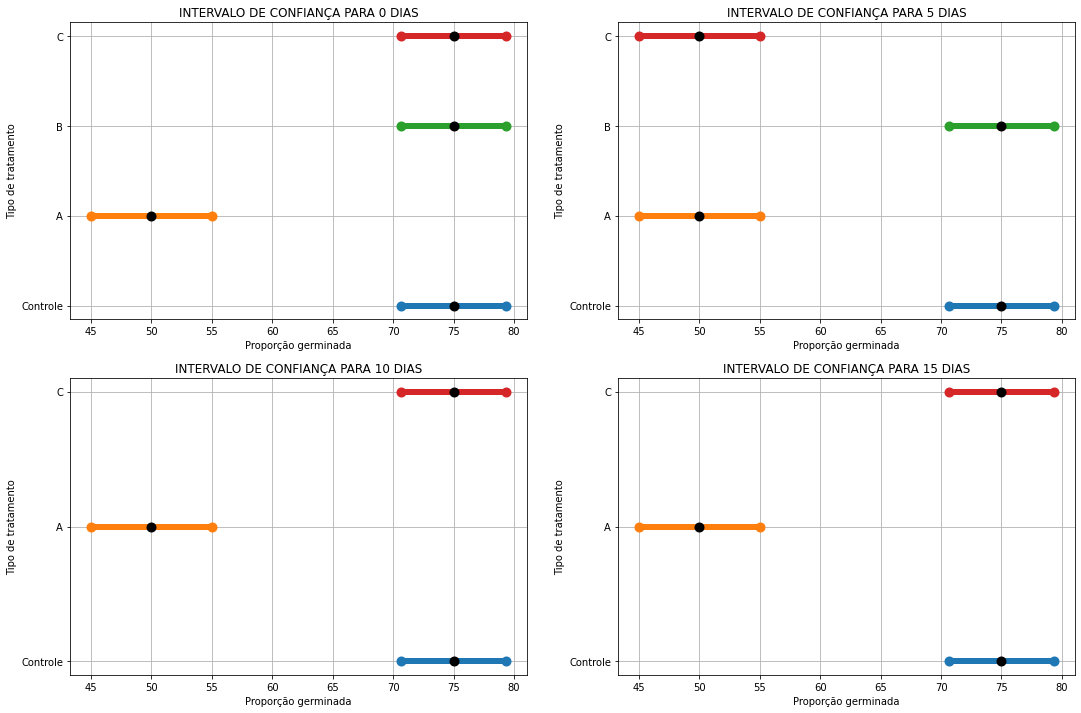

In [57]:
plt.figure(figsize=(18, 12))

# Plotando os intervalos de confiança e pontos médios:
# Para 0 dias
plt.subplot(2, 2, 1)
plt.plot([lim_inf_0_contr, lim_sup_0_contr], ["Controle", "Controle"], linewidth=6, mew=4, marker='o', color='tab:blue')
plt.plot([lim_inf_A0, lim_sup_A0], ["A", "A"], linewidth=6, mew=4, marker='o', color='tab:orange')
plt.plot([lim_inf_B0, lim_sup_B0], ["B", "B"], linewidth=6, mew=4, marker='o', color='tab:green')
plt.plot([lim_inf_C0, lim_sup_C0], ["C", "C"], linewidth=6, mew=4, marker='o', color='tab:red')

plt.plot([dados_proporcao["0"]["Controle"]], ["Controle"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["0"]["A"]], ["A"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["0"]["B"]], ["B"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["0"]["C"]], ["C"], mew=4, marker='o', color='black')

plt.title('INTERVALO DE CONFIANÇA PARA 0 DIAS')
plt.xlabel('Proporção germinada')
plt.ylabel('Tipo de tratamento')
plt.grid(True)

# Para 5 dias
plt.subplot(2, 2, 2)
plt.plot([lim_inf_5_contr, lim_sup_5_contr], ["Controle", "Controle"], linewidth=6, mew=4, marker='o', color='tab:blue')
plt.plot([lim_inf_A5, lim_sup_A5], ["A", "A"], linewidth=6, mew=4, marker='o', color='tab:orange')
plt.plot([lim_inf_B5, lim_sup_B5], ["B", "B"], linewidth=6, mew=4, marker='o', color='tab:green')
plt.plot([lim_inf_C5, lim_sup_C5], ["C", "C"], linewidth=6, mew=4, marker='o', color='tab:red')

plt.plot([dados_proporcao["5"]["Controle"]], ["Controle"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["5"]["A"]], ["A"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["5"]["B"]], ["B"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["5"]["C"]], ["C"], mew=4, marker='o', color='black')

plt.title('INTERVALO DE CONFIANÇA PARA 5 DIAS')
plt.xlabel('Proporção germinada')
plt.ylabel('Tipo de tratamento')
plt.grid(True)

# Para 10 dias
plt.subplot(2, 2, 3)
plt.plot([lim_inf_10_contr, lim_sup_10_contr], ["Controle", "Controle"], linewidth=6, mew=4, marker='o', color='tab:blue')
plt.plot([lim_inf_A10, lim_sup_A10], ["A", "A"], linewidth=6, mew=4, marker='o', color='tab:orange')
plt.plot([lim_inf_C10, lim_sup_C10], ["C", "C"], linewidth=6, mew=4, marker='o', color='tab:red')

plt.plot([dados_proporcao["10"]["Controle"]], ["Controle"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["10"]["A"]], ["A"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["10"]["C"]], ["C"], mew=4, marker='o', color='black')

plt.title('INTERVALO DE CONFIANÇA PARA 10 DIAS')
plt.xlabel('Proporção germinada')
plt.ylabel('Tipo de tratamento')
plt.grid(True)

# Para 15 dias
plt.subplot(2, 2, 4)
plt.plot([lim_inf_15_contr, lim_sup_15_contr], ["Controle", "Controle"], linewidth=6, mew=4, marker='o', color='tab:blue')
plt.plot([lim_inf_A15, lim_sup_A15], ["A", "A"], linewidth=6, mew=4, marker='o', color='tab:orange')
plt.plot([lim_inf_C15, lim_sup_C15], ["C", "C"], linewidth=6, mew=4, marker='o', color='tab:red')

plt.plot([dados_proporcao["15"]["Controle"]], ["Controle"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["15"]["A"]], ["A"], mew=4, marker='o', color='black')
plt.plot([dados_proporcao["15"]["C"]], ["C"], mew=4, marker='o', color='black')

plt.title('INTERVALO DE CONFIANÇA PARA 15 DIAS')
plt.xlabel('Proporção germinada')
plt.ylabel('Tipo de tratamento')
plt.grid(True)

plt.show()

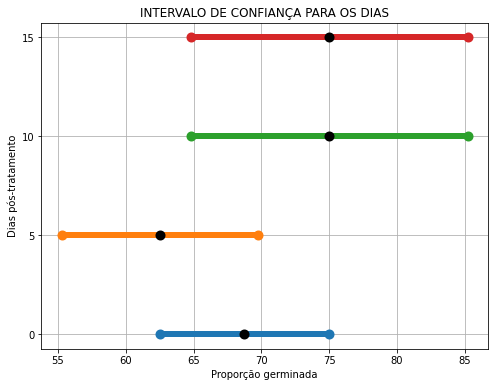

In [58]:
f, ax = plt.subplots(figsize=(8, 6))
plt.plot([lim_inf_0, lim_sup_0], ["0", "0"], linewidth=6, mew=4, marker='o')
plt.plot([lim_inf_5, lim_sup_5], ["5", "5"], linewidth=6, mew=4, marker='o')
plt.plot([lim_inf_10, lim_sup_10], ["10", "10"], linewidth=6, mew=4, marker='o')
plt.plot([lim_inf_15, lim_sup_15], ["15", "15"], linewidth=6, mew=4, marker='o')

plt.plot([medidas_descritivas["0"]["Media"]], ["0"], mew=4, marker='o', color='black')
plt.plot([medidas_descritivas["5"]["Media"]], ["5"], mew=4, marker='o', color='black')
plt.plot([medidas_descritivas["10"]["Media"]], ["10"], mew=4, marker='o', color='black')
plt.plot([medidas_descritivas["15"]["Media"]], ["15"], mew=4, marker='o', color='black')

plt.title('INTERVALO DE CONFIANÇA PARA OS DIAS')
plt.xlabel('Proporção germinada')
plt.ylabel('Dias pós-tratamento')
plt.grid(True)
plt.show()

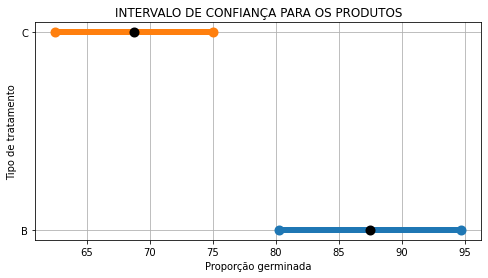

In [59]:
# Plotando os intervalos de confiança
f, ax = plt.subplots(figsize=(8, 4))
plt.plot([lim_inf_B, lim_sup_B], ["B", "B"], linewidth=6, mew=4, marker='o')
plt.plot([lim_inf_C, lim_sup_C], ["C", "C"], linewidth=6, mew=4, marker='o')

# Plotando o ponto central
plt.plot([medidas_T_descritivas["B"]["Media"]], ["B"], mew=4, marker='o', color='black')
plt.plot([medidas_T_descritivas["C"]["Media"]], ["C"], mew=4, marker='o', color='black')

plt.title('INTERVALO DE CONFIANÇA PARA OS PRODUTOS')
plt.xlabel('Proporção germinada')
plt.ylabel('Tipo de tratamento')
plt.grid(True)
plt.show()

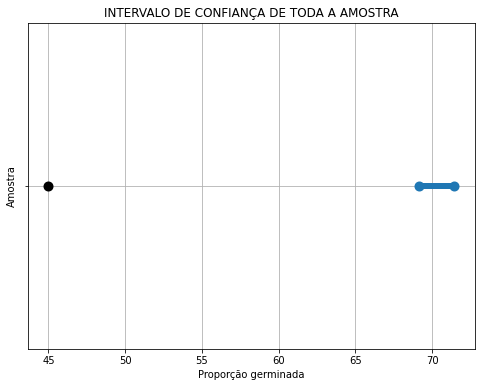

In [60]:
f, ax = plt.subplots(figsize=(8, 6))
plt.plot([lim_inf_germinadas, lim_sup_germinadas], ["", ""], linewidth=6, mew=4, marker='o')

plt.plot(total_germinadas, [""], mew=4, marker='o', color='black')

plt.title('INTERVALO DE CONFIANÇA DE TODA A AMOSTRA')
plt.xlabel('Proporção germinada')
plt.ylabel('Amostra')
plt.grid(True)
plt.show()

#### Calculando o **Epsilon**

In [61]:
# Utilizando a margem de erro para calcular o epsilon do tamanho amostral
epsilons = margem_erro.copy()

# Calculando a variância de cada amostra de determinado dia e tipo de tratamento
for dia, tipos in epsilons.iteritems():
  for tratamento, valor in tipos.iteritems():
    epsilons[dia][tratamento] = round(2 * np.sqrt(valor/4), 2)
epsilons

Dias de Armazenamento,0,5,10,15
Tipo de Tratamento,,,,
Controle,4.33,4.33,4.33,4.33
A,5.00,5.00,5.00,5.00
B,4.33,4.33,0.00,0.00
C,4.33,5.00,4.33,4.33


In [62]:
print(tabulate(epsilons, headers='keys', tablefmt='fancy_grid', numalign="center"))

╒══════════════════════╤══════╤══════╤══════╤══════╕
│ Tipo de Tratamento   │  0   │  5   │  10  │  15  │
╞══════════════════════╪══════╪══════╪══════╪══════╡
│ Controle             │ 4.33 │ 4.33 │ 4.33 │ 4.33 │
├──────────────────────┼──────┼──────┼──────┼──────┤
│ A                    │  5   │  5   │  5   │  5   │
├──────────────────────┼──────┼──────┼──────┼──────┤
│ B                    │ 4.33 │ 4.33 │  0   │  0   │
├──────────────────────┼──────┼──────┼──────┼──────┤
│ C                    │ 4.33 │  5   │ 4.33 │ 4.33 │
╘══════════════════════╧══════╧══════╧══════╧══════╛


In [63]:
# Margem de erro definida através do tamanho amostral para:
# 0 dias

epsilon0 = 2*np.sqrt(medidas_descritivas["0"]["Variancia"]/16)
# 5 dias
epsilon5 = 2*np.sqrt(medidas_descritivas["5"]["Variancia"]/16)
epsilon5 = epsilon5.round(2)
# 10 dias
epsilon10 = 2*np.sqrt(medidas_descritivas["10"]["Variancia"]/16)
epsilon10 = epsilon10.round(2)
# 15 dias
epsilon15 = 2*np.sqrt(medidas_descritivas["15"]["Variancia"]/16)
epsilon15 = epsilon15.round(2)

In [64]:
print("A margem de erro para 0 dias, obtida através do tamanho amostral definido, é " + str(epsilon0) + "%")
print("A margem de erro para 5 dias, obtida através do tamanho amostral definido, é " + str(epsilon5) + "%")
print("A margem de erro para 10 dias, obtida através do tamanho amostral definido, é " + str(epsilon10) + "%")
print("A margem de erro para 15 dias, obtida através do tamanho amostral definido, é " + str(epsilon15) + "%")

A margem de erro para 0 dias, obtida através do tamanho amostral definido, é 6.25%
A margem de erro para 5 dias, obtida através do tamanho amostral definido, é 7.22%
A margem de erro para 10 dias, obtida através do tamanho amostral definido, é 10.21%
A margem de erro para 15 dias, obtida através do tamanho amostral definido, é 10.21%


In [65]:
from tabulate import tabulate
table = [['Dias pós-tratamento', 'Margem de erro'], 
         ["0 dias", str(epsilon0) + ' %'], 
         ["5 dias", str(epsilon5) + ' %'], 
         ["10 dias", str(epsilon10) + ' %'],
         ["15 dias", str(epsilon15) + ' %']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════╤══════════════════╕
│ Dias pós-tratamento   │ Margem de erro   │
╞═══════════════════════╪══════════════════╡
│ 0 dias                │ 6.25 %           │
├───────────────────────┼──────────────────┤
│ 5 dias                │ 7.22 %           │
├───────────────────────┼──────────────────┤
│ 10 dias               │ 10.21 %          │
├───────────────────────┼──────────────────┤
│ 15 dias               │ 10.21 %          │
╘═══════════════════════╧══════════════════╛


In [66]:
# Margem de erro definida através do tamanho amostral para:
# 10 dias
epsilon_B = 2*np.sqrt(medidas_T_descritivas["B"]["Variancia"]/16)
epsilon_B = epsilon_B.round(2)
# 15 dias
epsilon_C = 2*np.sqrt(medidas_T_descritivas["C"]["Variancia"]/16)
epsilon_C = epsilon_C.round(2)

In [67]:
table = [['Tipo de tratamento', 'Margem de erro'], 
         ["Controle", "-"], 
         ["A", "-"], 
         ["B", str(epsilon_B) + ' %'],
         ["C", str(epsilon_C) + ' %']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════╤══════════════════╕
│ Tipo de tratamento   │ Margem de erro   │
╞══════════════════════╪══════════════════╡
│ Controle             │ -                │
├──────────────────────┼──────────────────┤
│ A                    │ -                │
├──────────────────────┼──────────────────┤
│ B                    │ 7.22 %           │
├──────────────────────┼──────────────────┤
│ C                    │ 6.25 %           │
╘══════════════════════╧══════════════════╛


In [68]:
epsilon_amostra = 2*np.sqrt(var_germinadas/64)
epsilon_amostra = epsilon_amostra.round(2)

In [69]:
table = [['', 'Margem de erro'],
         ["Amostra", str(epsilon_amostra) + ' %']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', numalign="center"))

╒═════════╤══════════════════╕
│         │ Margem de erro   │
╞═════════╪══════════════════╡
│ Amostra │ 1.14 %           │
╘═════════╧══════════════════╛


### Análise Bivariada

#### Construindo Tabela de Contingência

In [70]:
# Construindo Tabela de Contigência entre DIAS PÓS-TRATAMENTO e TIPO DE TRATAMENTO
tabela_contingencia = dados_germinacao.copy()
tabela_contingencia.loc['Total'] = tabela_contingencia.sum(axis=0).astype(int)
tabela_contingencia['Total'] = tabela_contingencia.sum(axis=1).astype(int)

In [71]:
tabela_contingencia.head()

Dias de Armazenamento,0,5,10,15,Total
Tipo de Tratamento,,,,,
Controle,3,3,3,3,12
A,2,2,2,2,8
B,3,3,4,4,14
C,3,2,3,3,11
Total,11,10,12,12,45


In [72]:
# Segmentando com base na variável TIPO DE TRATAMENTO
# Criando DataFrame para porcentagem de sementes germinadas do ttotal
tratamento_germinadas = pd.DataFrame(columns = ["Porcentagem do Total de Germinadas"])

# Coletando o número total de sementes germinadas
total_germinadas = tabela_contingencia.loc['Total']['Total']

# Calculando porcentagem do número total de sementes germinadas em cada tipo de tratamento
tratamento_germinadas["Porcentagem do Total de Germinadas"] = 100 *  tabela_contingencia['Total'][:4] / total_germinadas

# Arredondando porcentagens em 3 casas decimais
tratamento_germinadas = round(tratamento_germinadas, 3)

In [73]:
tratamento_germinadas.head()

,Porcentagem do Total de Germinadas
Tipo de Tratamento,
Controle,26.667
A,17.778
B,31.111
C,24.444


#### Visualização Por Gráfico de Pizza

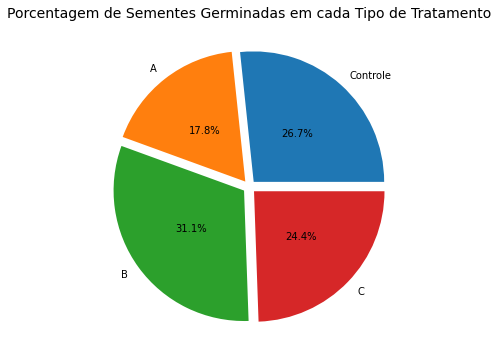

In [74]:
# Plotando um gráfico de pizza com a porcentagem com base no tratamento dado
pie, ax = plt.subplots(figsize=[10,6])
labels = list(tratamento_germinadas.index)
plt.pie(x=np.array(tratamento_germinadas).ravel(), autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Porcentagem de Sementes Germinadas em cada Tipo de Tratamento", fontsize=14);

In [75]:
# Segmentando com base na variável DIAS PÓS-TRATAMENTO
# Criando DataFrame para porcentagem de sementes germinadas do total
dias_germinadas = pd.DataFrame(columns = ["Porcentagem do Total de Germinadas"])

# Calculando porcentagem do número total de sementes germinadas em cada período pós-tratamento
dias_germinadas["Porcentagem do Total de Germinadas"] = 100 *  tabela_contingencia.loc['Total'][:4] / total_germinadas

# Arredondando porcentagens em 3 casas decimais
dias_germinadas = round(dias_germinadas, 3)

In [76]:
dias_germinadas.head()

,Porcentagem do Total de Germinadas
Dias de Armazenamento,
0,24.444
5,22.222
10,26.667
15,26.667


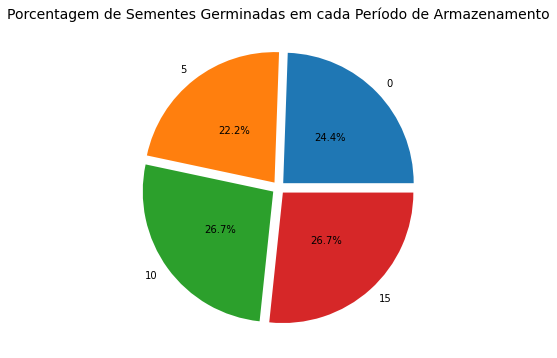

In [77]:
# Plotando um gráfico de pizza com a porcentagem com base no tratamento dado
pie, ax = plt.subplots(figsize=[10,6])
labels = list(dias_germinadas.index)
plt.pie(x=np.array(dias_germinadas).ravel(), autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Porcentagem de Sementes Germinadas em cada Período de Armazenamento", fontsize=14);

#### Visualização por Gráficos de Barra Acumulado

In [78]:
#Relativizando os dados para as sementes
bivar_sementes = dados_germinacao_T.copy()
bivar_sementes /= list(total_tratamentos)
bivar_sementes

Tipo de Tratamento,Controle,A,B,C
Dias de Armazenamento,,,,
0,0.25,0.25,0.214286,0.272727
5,0.25,0.25,0.214286,0.181818
10,0.25,0.25,0.285714,0.272727
15,0.25,0.25,0.285714,0.272727


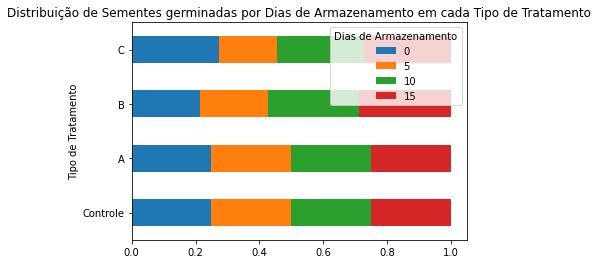

In [82]:
bivar_sementes.T.reset_index().plot(
    x = 'Tipo de Tratamento',
    kind = 'barh',
    stacked = True,
    title = 'Distribuição de Sementes germinadas por Dias de Armazenamento em cada Tipo de Tratamento',
    mark_right = True)

In [80]:
#Relativizando os dados para os dias
bivar_dias = dados_germinacao.copy()
bivar_dias /= list(total_dias)
bivar_dias

Dias de Armazenamento,0,5,10,15
Tipo de Tratamento,,,,
Controle,0.272727,0.3,0.250000,0.250000
A,0.181818,0.2,0.166667,0.166667
B,0.272727,0.3,0.333333,0.333333
C,0.272727,0.2,0.250000,0.250000


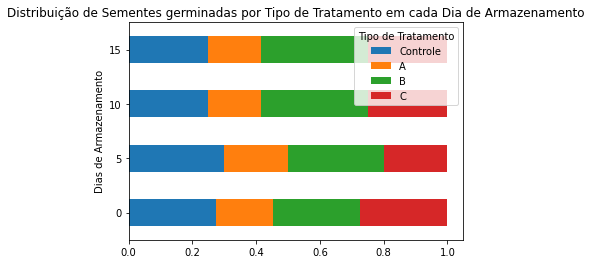

In [83]:
bivar_dias.T.reset_index().plot(
    x = 'Dias de Armazenamento',
    kind = 'barh',
    stacked = True,
    title = 'Distribuição de Sementes germinadas por Tipo de Tratamento em cada Dia de Armazenamento',
    mark_right = True)